# Lecture 01
This is a *Jupyter Notebook*.  Analogy:  Google Docs.

In [1]:
# Pay no attention to this code

from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def read_file(f):
    with open (f, 'r') as file:
        data=file.read()
    return data

## Reading books

In [2]:
# Read three books, quickly!

huck_finn_text = read_file('huck_finn.txt')
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_text = read_file('little_women.txt')
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

lotr1_text = read_file('lotr1.txt')
lotr1_chapters = lotr1_text.split('CHAPTER ')[1:]

In [3]:
huck_finn_text

'\ufeff\n\nThe Project Gutenberg EBook of Adventures of Huckleberry Finn, Complete\nby Mark Twain (Samuel Clemens)\n\nThis eBook is for the use of anyone anywhere at no cost and with almost\nno restrictions whatsoever. You may copy it, give it away or re-use\nit under the terms of the Project Gutenberg License included with this\neBook or online at www.gutenberg.net\n\nTitle: Adventures of Huckleberry Finn, Complete\n\nAuthor: Mark Twain (Samuel Clemens)\n\nRelease Date: August 20, 2006 [EBook #76]\n\nLast Updated: April 18, 2015]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK HUCKLEBERRY FINN ***\n\nProduced by David Widger\n\n\n\n\n\nADVENTURES\n\nOF\n\nHUCKLEBERRY FINN\n\n(Tom Sawyer\'s Comrade)\n\nBy Mark Twain\n\nComplete\n\n\n\n\nCONTENTS.\n\nCHAPTER I. Civilizing Huck.--Miss Watson.--Tom Sawyer Waits.\n\nCHAPTER II. The Boys Escape Jim.--Torn Sawyer\'s Gang.--Deep-laid Plans.\n\nCHAPTER III. A Good Going-over.--Grace Triumphant.--"One of Tom Sawyers\'s\nLies

In [4]:
# Display the chapters of Huckleberry Finn in a table.

Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees ba ...
"III. WELL, I got a good going-over in the morning from ..."
"IV. WELL, three or four months run along, and it was we ..."
V. I had shut the door to. Then I turned around and th ...
"VI. WELL, pretty soon the old man was up and around aga ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and l ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the ...
X. AFTER breakfast I wanted to talk about the dead man ...


**Q:** Why is the first word of each chapter in ALL CAPS?

## Analysis of book data

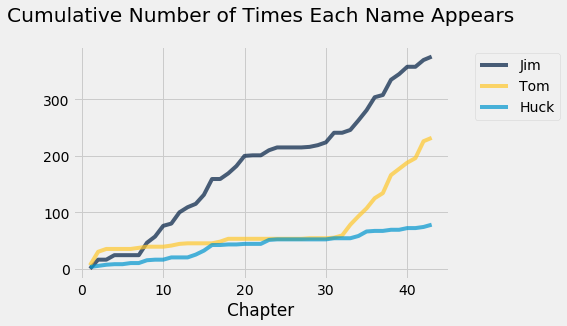

In [5]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter.

counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08);

* **Q:** What's the first thing you notice?
* **Q:** Who is the main character?
* **Q:** What's going on with Tom's line?

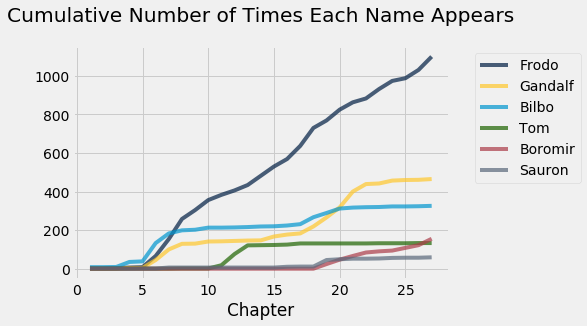

In [6]:
counts = Table().with_columns([
        'Frodo', np.char.count(lotr1_chapters, 'Frodo'),
        'Gandalf', np.char.count(lotr1_chapters, 'Gandalf'),    
        'Bilbo', np.char.count(lotr1_chapters, 'Bilbo'),
        'Tom', np.char.count(lotr1_chapters, 'Tom'),
        'Boromir', np.char.count(lotr1_chapters, 'Boromir'),
        'Sauron', np.char.count(lotr1_chapters, 'Sauron'),
    ])

# Plot the cumulative counts.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 28, 1))
cum_counts.plot(column_for_xticks=6)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08);

## Characters

A *character* can be:
* a person in a book
* [especially in programming] a printed symbol, such as a letter or number or punctuation mark

In [7]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])
chars_periods_lotr1 = Table().with_columns([
        'LoTR1 Chapter Length', [len(s) for s in lotr1_chapters],
        'Number of Periods', np.char.count(lotr1_chapters, '.')
    ])

chars_periods_huck_finn

Huck Finn Chapter Length,Number of Periods
7088,66
12113,117
8612,72
6892,84
8269,91
14672,125
13349,127
22483,249
8153,71
7109,70


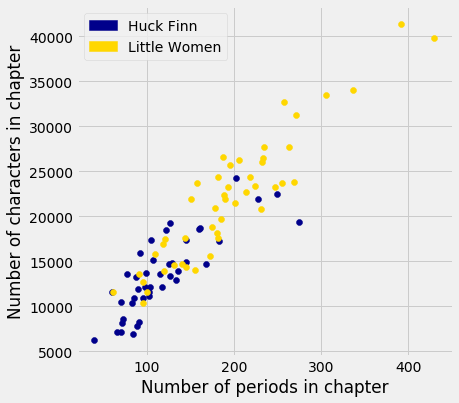

In [8]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1), 
              chars_periods_huck_finn.column(0), 
              color='darkblue')
plots.scatter(chars_periods_little_women.column(1), 
              chars_periods_little_women.column(0), 
              color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

darkblue_patch = mpatches.Patch(color='darkblue', label='Huck Finn')
gold_patch = mpatches.Patch(color='gold', label='Little Women')
plt.legend(handles=[darkblue_patch, gold_patch])
plt.show()

* **Q:** Which book has longer chapters?
* **Q:** Do you notice any kind of shape in the plot?
* **Q:** If there are about 100 periods in a chapter, about how many characters are in it?
* **Q:** If there are about 200 periods in a chapter, about how many characters are in it?
* **Q:** How many periods are there per chapter, approximately?
* **Q:** And where does that number show up IRL?

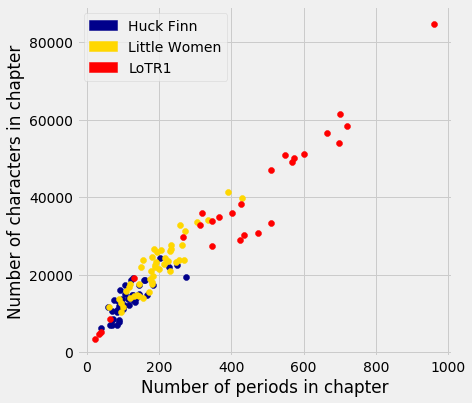

In [9]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1), 
              chars_periods_huck_finn.column(0), 
              color='darkblue')
plots.scatter(chars_periods_little_women.column(1), 
              chars_periods_little_women.column(0), 
              color='gold')
plots.scatter(chars_periods_lotr1.column(1), 
              chars_periods_lotr1.column(0), 
              color='red')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

darkblue_patch = mpatches.Patch(color='darkblue', label='Huck Finn')
gold_patch = mpatches.Patch(color='gold', label='Little Women')
red_patch = mpatches.Patch(color='red', label='LoTR1')
plt.legend(handles=[darkblue_patch, gold_patch, red_patch])
plt.show()